# Handwritten digits

## Time to get your hands dirty. Handwritten digits.

Sometimes you might want to apply multiple ML techniques. For example, just because you have labels in your training data doesn't mean that a regression algorithm will work very well.  So, you might want to start with a clustering or dimensional reduction algorithm first.

Here we're going to use the [MNIST database](https://en.wikipedia.org/wiki/MNIST_database). This contains a set of images with handwritten digts. It is one of the most widely used and best studied datasets in the whole of machine learning. It's part of the standard tests new tecniques need to face. 

### Tasks. Part 0.

1) First thing, grab a piece of paper and visually classify those 25 digits. We'll see if you're better or worse than a computer! 


2) Here is how you plot the images and the corresponding labels  (The one thing I'm not telling you of course is the random seed I used to select those above). After you've seen this ones, go back to your piece of paper and update your choices if you want. Keep track of both set of preditions. This is like supervised learning.  


the data is simply each pixel value within an $8\times 8$ grid.  For this analysis, we don't care about the $2$-D nature of the image, we can just treat it as an $8\times8=64$ dimensional array. So our data have $1797$ samples in $64$ dimensions.

Then each of the $1797$ ***images*** has a label.

### Tasks. Part 1. Unsupervised Learning: Dimensionality Reduction on Digits

We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to plot points in $N=64$ dimensions! So we need to reduce the dimensionality of the space


3) Use the unsupervised dimensionality reduction technique called **[`Isomap`](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html#sklearn.manifold.Isomap)**. Isomap is an embedding tecnique, which tries to understand if your $N$ dimensional datapoint live in a $N$ dimensional (with $N<M$) manyfold. Have a look at the Isomap documentation and reduce the MINST dataset.  Do some plots to visualize your results 

*Note*. Isomap is very recent. It was introduced by [Tenenbaum et al (2000)](https://www.science.org/doi/10.1126/science.290.5500.2319) ---a paper that has something like $1.5\times 10^4$ [citations](https://www.science.org/doi/full/10.1126/science.290.5500.2319).


### Tasks. Part 2. Supervised Learning: Classification on Digits

Now we want to classify the dataset. 

4) Split the dataset taking 80% of the images as tranining dataset and leaving the other 20% as a validation set. You need `sklearn.model_selection.train_test_split`.

5) Use a simple [`Logistic Regression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) which despite its name is a common classification algorithm. (I know, this is confusing!). Use the flag `solver='sag'`, the default solver had a bug, at least in my version.

6) Compute the accuracy (`sklearn.metrics.accuracy_score`) of your emulator. In this context, accuracy is simply the fraction of the digits that were correctly identified. Compute the accuracy on both the training and the validation set. Comment on the results.

7) The accuracy is a single number doesn't tell us ***where*** we've gone wrong. Plot the ***confusion matrix*** as we did above. What are the digits that are more challenging to identify, does it make sense?


There are many ways to improve this classifier, for example using a more sophisticated model, use cross validation, etc.  We'll get to those in the coming weeks.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as skm
import seaborn as sns

from tqdm import tqdm
from sklearn import datasets
from sklearn.manifold import Isomap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score

Load and explore the dataset

In [2]:
digits = datasets.load_digits()
print(digits.images.shape) # figure
print(digits.keys()) # dictionary of the dataset
#print(digits.DESCR) # description

(1797, 8, 8)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


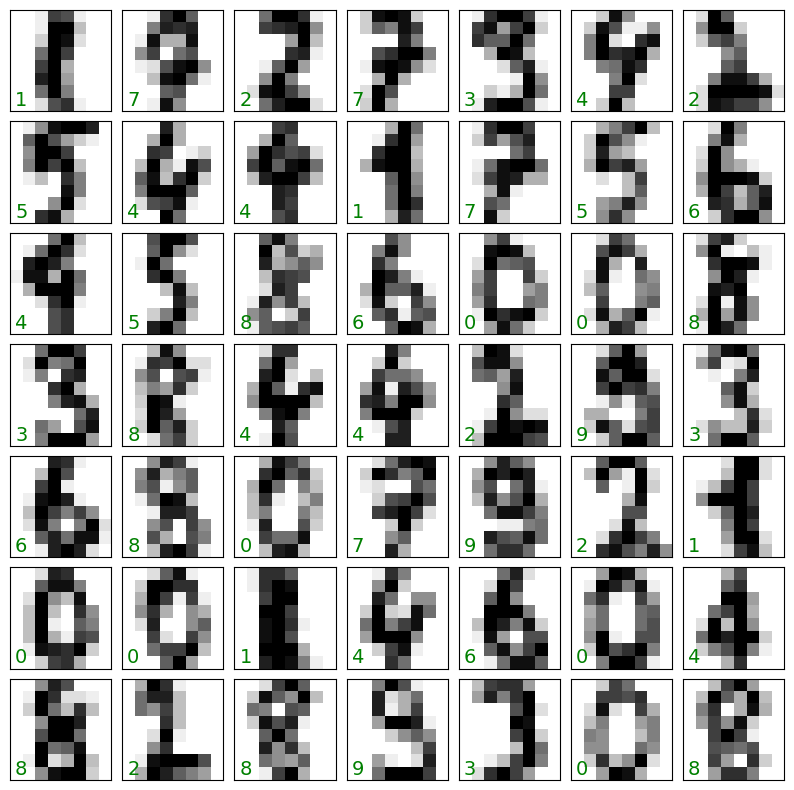

In [3]:
fig, axes = plt.subplots(7,7, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

np.random.seed(42)
mychoices = np.random.choice(digits.images.shape[0],100)

for i, ax in enumerate(axes.flat):
    ax.imshow((digits.images[mychoices[i]]), 
              cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[mychoices[i]]),transform=ax.transAxes, color='green', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()
plt.close()

I recall some definitions to understand better

**n_samples:**

The number of samples: each sample is an item to process (e.g. classify). A sample can be a document, a picture, a sound, a video, an astronomical object, a row in database or CSV file, or whatever you can describe with a fixed set of quantitative traits.

**n_features:**


The number of features or distinct traits that can be used to describe each item in a quantitative manner. Features are generally real-valued, but may be boolean or discrete-valued in some cases.



In our case, I have 1797 samples (numbers) and for each number 64 features (pixels).

In [4]:
    
# data shape in right format: (n_samples, n_features)
print(digits.data.shape)

# The images themselves in matrix form
print('An image as a martix: ', '\n', digits.images[0])

# The labels, targets for each of the 1797 matrices
print('Ture labels: ', digits.target)
print(digits.target.shape)


(1797, 64)
An image as a martix:  
 [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
Ture labels:  [0 1 2 ... 8 9 8]
(1797,)


## Isomap unsupervised dimensionality reduction

This method reduces the dimensionality of the problem: from 64 features to just 2!

In principle you can change the number of components

In [5]:
embedding = Isomap(n_neighbors = 5, n_components = 2)

# Reducing the dimensionality of all data
Transformed_data = embedding.fit_transform(digits.data)
print('New sahpe of the data: ', Transformed_data.shape)

/Users/federicofantoccoli/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/federicofantoccoli/anaconda3/lib/python3.12/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


New sahpe of the data:  (1797, 2)


/var/folders/g_/40lz4w497n1gy_c45xmkxftw0000gn/T/ipykernel_47684/3684107737.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  base = plt.cm.get_cmap(base_cmap)


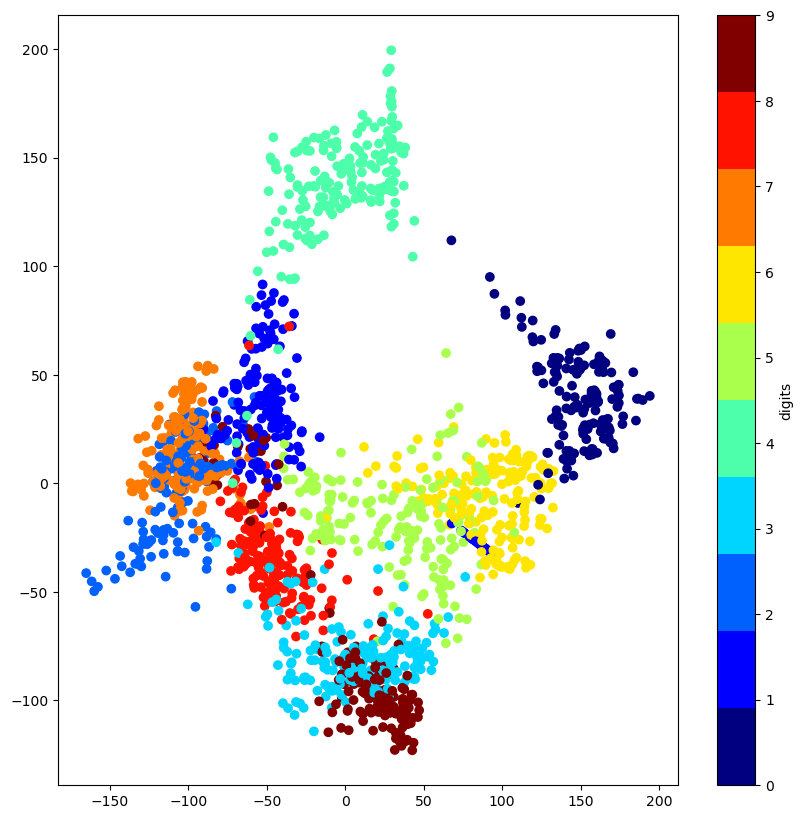

In [6]:
# From github page
def discrete_cmap(N, base_cmap=None):

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:
        
    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)


plt.figure(figsize = (10, 10))
plt.scatter(Transformed_data[:,0], Transformed_data[:,1], c = digits.target, cmap = discrete_cmap(10, 'jet'))
plt.colorbar(label = 'digits', ticks = range(10))

From this plot we see how the digit are oranized in the new parameters space; we used the true labels in this case. Now I try a classification and check what are the most confused numbers by the algorithm. we'll expect a bit of confusion in 2 and 7 because in this space they are almost superimposed

# Supervised classification

I can use the result of my dimensionality reduction to classify the data. This could be useful

In [7]:
# Split in train and test samples
xtrain, xtest, ytrain, ytest = train_test_split(Transformed_data, digits.target, train_size=0.8)
Regression = LogisticRegression(max_iter = 10000, penalty = 'l2')

In [8]:
# Training and check the behaviour of the algorithm on the training set
Regression.fit(xtrain, ytrain)

LogisticRegression(max_iter=10000)

Test set score:  0.6805555555555556
CONF MATRIX INTERPRETATION: the number of observations known to be in row-i and predicted to be in column-j


Text(0.5, 1.0, 'Test set')

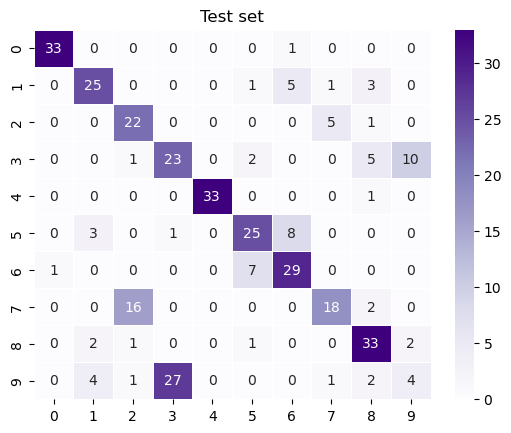

In [11]:
# Apply it on the test set and check if it works properly
y_pred_test = Regression.predict(xtest)
print('Test set score: ', skm.accuracy_score(ytest, y_pred_test))
print('CONF MATRIX INTERPRETATION: the number of observations known to be in row-i and predicted to be in column-j')

sns.heatmap(skm.confusion_matrix(ytest, y_pred_test),cmap = 'Purples', linewidths = 0.5, annot = True)
plt.title('Test set')


We see that the accuracy of the algorithm is low, probabily two components are not sufficient to caputre all the information in the dataset,
we need more of them!

# More components

Now I try to add more components to the Isomap procedure and look at how the accuracy change, we plot also one confusion matrix to compare to the previous result

In [10]:
n_comps = np.linspace(2, 64, 15, dtype = int)
accuracy = []

for i in tqdm(n_comps):
    embedding = Isomap(n_neighbors = 5, n_components = i)
    Transformed_data = embedding.fit_transform(digits.data)

    xtrain, xtest, ytrain, ytest = train_test_split(Transformed_data, digits.target, train_size=0.8)
    Regression = LogisticRegression(penalty = 'l2', max_iter = 10000)
    Regression.fit(xtrain, ytrain)

    y_pred_test = Regression.predict(xtest)    
    accuracy.append(skm.accuracy_score(ytest, y_pred_test))
    print('Accuracy for ' + str(i) + ': ', skm.accuracy_score(ytest, y_pred_test))
    print(skm.confusion_matrix(ytest, y_pred_test), '\n')

        

  0%|                                                    | 0/15 [00:00<?, ?it/s]/Users/federicofantoccoli/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/federicofantoccoli/anaconda3/lib/python3.12/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
  7%|██▉                                         | 1/15 [00:01<00:22,  1.64s/it]

Accuracy for 2:  0.7055555555555556
[[31  0  0  0  0  0  2  0  0  0]
 [ 0 31  0  0  0  2  5  3  1  0]
 [ 0  3 24  0  0  0  0 10  1  0]
 [ 0  0  0 14  0  0  0  0  2 22]
 [ 0  2  0  0 30  0  0  0  0  0]
 [ 0  5  0  1  0 24  6  0  0  0]
 [ 0  1  0  0  0  5 33  0  0  0]
 [ 0  2 17  0  0  0  0 17  2  0]
 [ 0  0  0  0  0  0  0  0 30  2]
 [ 0  2  2  5  0  0  0  1  2 20]] 



/Users/federicofantoccoli/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/federicofantoccoli/anaconda3/lib/python3.12/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
 13%|█████▊                                      | 2/15 [00:02<00:18,  1.43s/it]

Accuracy for 6:  0.9805555555555555
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  1  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  0  0  0]
 [ 0  0  0  0 47  0  0  0  0  0]
 [ 0  0  0  0  0 41  0  0  0  0]
 [ 0  1  0  0  0  0 35  0  1  0]
 [ 0  0  1  0  0  0  0 32  0  0]
 [ 0  1  0  1  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0  0  1 30]] 



/Users/federicofantoccoli/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/federicofantoccoli/anaconda3/lib/python3.12/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
 20%|████████▊                                   | 3/15 [00:04<00:18,  1.53s/it]

Accuracy for 10:  0.975
[[26  0  0  0  0  0  0  0  0  0]
 [ 0 41  1  0  0  0  0  0  2  0]
 [ 0  0 32  0  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  0  0]
 [ 0  0  0  0 26  0  0  0  0  0]
 [ 0  0  0  0  0 28  0  0  0  0]
 [ 0  0  0  0  0  1 50  0  0  0]
 [ 0  0  0  1  0  0  0 34  0  0]
 [ 0  1  0  0  0  0  0  0 32  1]
 [ 0  0  0  1  0  0  0  0  1 37]] 



/Users/federicofantoccoli/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/federicofantoccoli/anaconda3/lib/python3.12/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
 27%|███████████▋                                | 4/15 [00:05<00:15,  1.44s/it]

Accuracy for 15:  0.9583333333333334
[[33  0  0  0  0  0  1  0  0  0]
 [ 0 42  0  0  0  0  0  0  0  0]
 [ 0  0 26  0  0  0  0  0  0  0]
 [ 0  1  0 26  0  0  0  0  0  2]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  2]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  1  0  0 26  0  0]
 [ 0  2  0  1  0  0  0  0 45  0]
 [ 0  1  0  0  1  2  0  0  1 39]] 



/Users/federicofantoccoli/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/federicofantoccoli/anaconda3/lib/python3.12/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
 33%|██████████████▋                             | 5/15 [00:07<00:15,  1.52s/it]

Accuracy for 19:  0.9861111111111112
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 32  0  0  0  0  0  0  0]
 [ 0  0  0 38  0  1  0  0  0  1]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 26  1  0  0  0]
 [ 0  0  0  0  0  0 38  0  0  0]
 [ 0  0  0  1  0  0  0 37  0  0]
 [ 0  0  0  0  0  0  1  0 40  0]
 [ 0  0  0  0  0  0  0  0  0 37]] 



/Users/federicofantoccoli/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/federicofantoccoli/anaconda3/lib/python3.12/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
 40%|█████████████████▌                          | 6/15 [00:08<00:12,  1.44s/it]

Accuracy for 24:  0.9777777777777777
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  1  0]
 [ 0  0 37  0  0  0  0  0  0  0]
 [ 0  0  0 38  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  1]
 [ 0  0  0  0  0 33  0  0  0  1]
 [ 0  0  0  0  0  1 33  0  2  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  0  0  0  0  0  0  0 34  0]
 [ 0  0  0  1  0  0  0  0  1 26]] 



/Users/federicofantoccoli/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/federicofantoccoli/anaconda3/lib/python3.12/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
 47%|████████████████████▌                       | 7/15 [00:10<00:11,  1.38s/it]

Accuracy for 28:  0.9722222222222222
[[32  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  2  0]
 [ 0  0  0 33  0  0  0  1  0  1]
 [ 0  0  0  0 43  0  0  0  0  1]
 [ 0  0  0  0  0 31  1  0  0  1]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  0]
 [ 0  3  0  0  0  0  0  0 24  0]
 [ 0  0  0  0  0  0  0  0  0 41]] 



/Users/federicofantoccoli/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/federicofantoccoli/anaconda3/lib/python3.12/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
 53%|███████████████████████▍                    | 8/15 [00:11<00:09,  1.41s/it]

Accuracy for 33:  0.9833333333333333
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  1  0]
 [ 0  0 30  0  0  0  0  0  0  0]
 [ 0  0  1 34  0  0  0  0  0  1]
 [ 0  0  0  0 34  0  0  0  0  0]
 [ 0  0  0  0  0 35  0  0  0  1]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  1  0  0  0  0  0  0 36  0]
 [ 0  0  0  1  0  0  0  0  0 28]] 



/Users/federicofantoccoli/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/federicofantoccoli/anaconda3/lib/python3.12/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
 60%|██████████████████████████▍                 | 9/15 [00:12<00:08,  1.42s/it]

Accuracy for 37:  0.9777777777777777
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  0  0  1  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 25  0  0  0  0  0  1]
 [ 0  0  0  0 39  0  0  0  0  0]
 [ 0  0  0  0  0 38  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  1  0  0  0 36  0  0]
 [ 0  2  0  0  0  0  0  0 35  1]
 [ 0  1  0  0  0  1  0  0  0 37]] 



/Users/federicofantoccoli/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/federicofantoccoli/anaconda3/lib/python3.12/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
 67%|████████████████████████████▋              | 10/15 [00:14<00:07,  1.43s/it]

Accuracy for 41:  0.9916666666666667
[[31  0  0  0  0  0  0  0  0  0]
 [ 0 38  0  0  0  0  0  0  0  0]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 33  0  0  0  1]
 [ 0  0  0  0  0  0 42  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0]
 [ 0  1  0  0  0  0  0  0 30  0]
 [ 0  0  0  1  0  0  0  0  0 33]] 



/Users/federicofantoccoli/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/federicofantoccoli/anaconda3/lib/python3.12/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
 73%|███████████████████████████████▌           | 11/15 [00:15<00:05,  1.37s/it]

Accuracy for 46:  0.9805555555555555
[[44  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  1  1]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  1  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 36  0  0  0  0]
 [ 0  0  0  0  0  0 40  0  1  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  3  0  0  0  0  0  0 32  0]
 [ 0  0  0  0  0  0  0  0  0 29]] 



/Users/federicofantoccoli/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/federicofantoccoli/anaconda3/lib/python3.12/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
 80%|██████████████████████████████████▍        | 12/15 [00:17<00:04,  1.38s/it]

Accuracy for 50:  0.9805555555555555
[[28  0  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  1  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  0  0  2]
 [ 0  0  0  0 43  0  0  0  0  0]
 [ 0  0  0  0  0 36  0  0  0  0]
 [ 0  0  0  0  0  0 31  0  0  0]
 [ 0  0  0  0  0  0  0 38  0  1]
 [ 0  0  0  0  0  0  0  0 32  0]
 [ 0  0  0  0  0  3  0  0  0 33]] 



/Users/federicofantoccoli/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/federicofantoccoli/anaconda3/lib/python3.12/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
 87%|█████████████████████████████████████▎     | 13/15 [00:18<00:02,  1.38s/it]

Accuracy for 55:  0.9833333333333333
[[32  0  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  1  0  1  0]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  0  0]
 [ 0  0  0  0 31  0  0  0  0  0]
 [ 0  0  0  0  0 33  0  0  0  1]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 35  0  0]
 [ 0  1  0  0  0  0  0  0 36  0]
 [ 0  0  0  0  0  1  0  0  1 33]] 



/Users/federicofantoccoli/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/federicofantoccoli/anaconda3/lib/python3.12/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
 93%|████████████████████████████████████████▏  | 14/15 [00:19<00:01,  1.37s/it]

Accuracy for 59:  0.9888888888888889
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 45  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0]
 [ 0  0  0  0  0  0 33  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  0]
 [ 0  1  0  0  0  0  0  0 33  1]
 [ 0  0  0  0  0  2  0  0  0 30]] 



/Users/federicofantoccoli/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/federicofantoccoli/anaconda3/lib/python3.12/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
100%|███████████████████████████████████████████| 15/15 [00:21<00:00,  1.42s/it]

Accuracy for 64:  0.9777777777777777
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  0  1  0]
 [ 0  0 40  1  0  0  0  0  0  0]
 [ 0  0  0 35  0  0  0  0  0  0]
 [ 0  0  0  0 39  0  0  0  0  0]
 [ 0  0  0  0  0 26  1  0  0  1]
 [ 0  0  0  0  0  0 47  0  0  0]
 [ 0  0  0  0  0  0  0 37  0  1]
 [ 0  0  0  0  0  0  0  0 32  1]
 [ 0  0  0  0  0  1  0  0  1 34]] 



Text(0, 0.5, 'Accuracy')

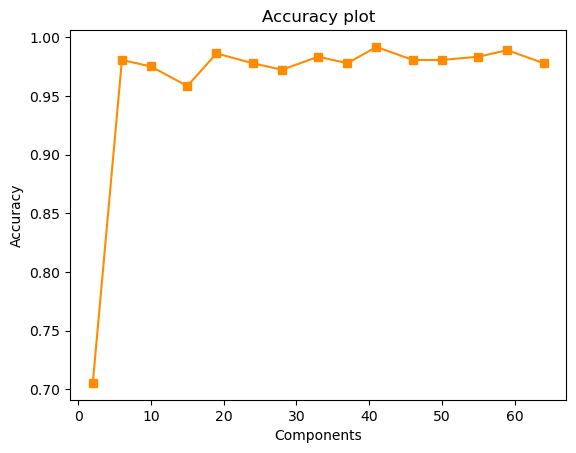

In [11]:
plt.plot(n_comps, accuracy, marker = 's', c = 'Darkorange')
plt.title('Accuracy plot')
plt.xlabel('Components')
plt.ylabel('Accuracy')

From these results I see that two components (first point) are too few to get a good classification on this digits. To reach a good level of accuracy I should use more than 6 components, after that the increasing in the accuracy of the classification with the number of components is low.

## Bonus: t - SNE and clustering

As suggested, I try to run a t-SNE algorithm as a dimensionality reduction and a unsupervised clustering instead of Isomap and a supervised classification as before.

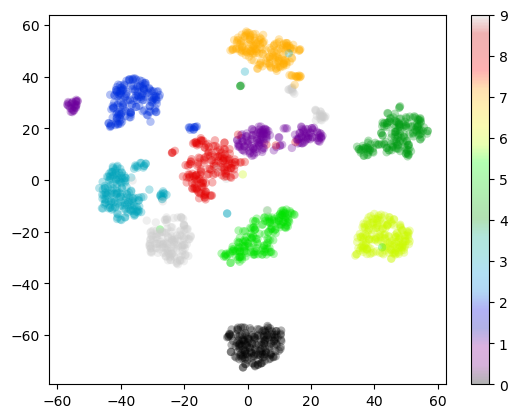

In [12]:
tsne = TSNE(n_components = 2, learning_rate = 200)

X_reduced = tsne.fit_transform(digits.data)

plt.scatter(X_reduced[:,0], X_reduced[:,1], c = digits.target, cmap = "nipy_spectral", alpha=0.3, edgecolor = "None")
plt.colorbar()

Here I do a classification with **only 2** components to see how it goes compared with a PCA

In [13]:
xtrain_SNE, xtest_SNE, ytrain_SNE, ytest_SNE = train_test_split(X_reduced, digits.target, train_size=0.8)

In [14]:
Regression = LogisticRegression(max_iter = 10000, penalty = 'l2')
Regression.fit(xtrain_SNE, ytrain_SNE)

LogisticRegression(max_iter=10000)

Test set accuracy score:  0.925


Text(0.5, 1.0, 'Test set')

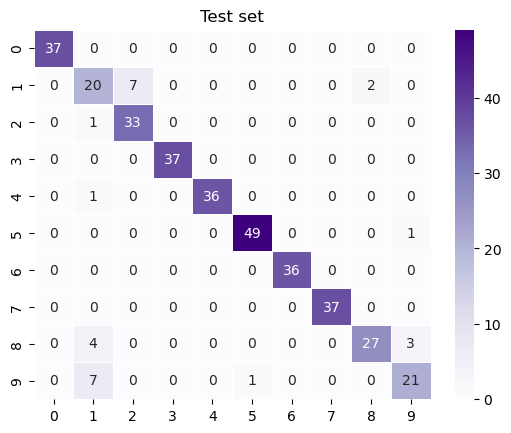

In [16]:
# Apply it on the test set and check if it works properly
SNE_pred = Regression.predict(xtest_SNE)
print('Test set accuracy score: ', skm.accuracy_score(ytest_SNE, SNE_pred))

sns.heatmap(skm.confusion_matrix(ytest_SNE, SNE_pred), cmap = 'Purples', linewidths = 0.5, annot = True)
plt.title('Test set')

I see that with the same number of components, this algorithm works much better in separating the single components

If I want to throw some clustering algorithm and do **unsupervised** analysis, I can't use labels... I try to find the right number of clusters for the problem, which I hope it will be 10! (I have only 10 numbers...)

I first try with the 'standard approach' and the default score of the method

In [17]:
scores = []
X_reduced_shuffled = shuffle(X_reduced)

for i in range(1, 20):
    
    scores.append(np.average(cross_val_score(KMeans(init="k-means++", n_clusters = i, n_init = 10, random_state=0), X_reduced_shuffled, cv = 5)))

scores = np.array(scores)

# n_init = Number of times the k-means algorithm is run with different centroid seeds. 
# The final results is the best output of n_init consecutive runs in terms of inertia. 

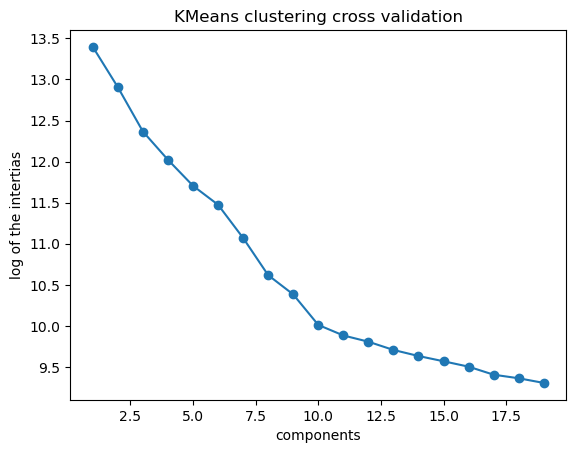

In [18]:
plt.plot(np.arange(1, 20, 1), np.log(-scores), marker = 'o')
plt.title('KMeans clustering cross validation')
plt.xlabel('components')
plt.ylabel('log of the intertias')
plt.show()

Of curse, If I keep on increasing the number of clusters I will get always a smaller and smaller distance between the two events, the slope changes at 10 components and probabily something interesting happens there.

I can do better maybe if I use this silhoutte scoring method: basically it is confined between -1 (incorrect clustering) and +1 (correct clustering); it takes into account the 'compactness' of the clusters related to the 'separation' between the clusters. The closer to one, the better. 

a: The mean distance between a sample and all other points in the same class.

b: The mean distance between a sample and all other points in the next nearest cluster.
$$s = \frac{b-a}{max(a,b)}$$

In [19]:
s_scores = []
X_reduced_shuffled = shuffle(X_reduced)

for i in range(2, 21):

    KM = KMeans(init="k-means++", n_clusters = i, n_init = 10, random_state=0)
    KM.fit(X_reduced_shuffled)
    s_scores.append(silhouette_score(X_reduced_shuffled, KM.labels_, metric = 'euclidean'))

s_scores = np.array(s_scores)

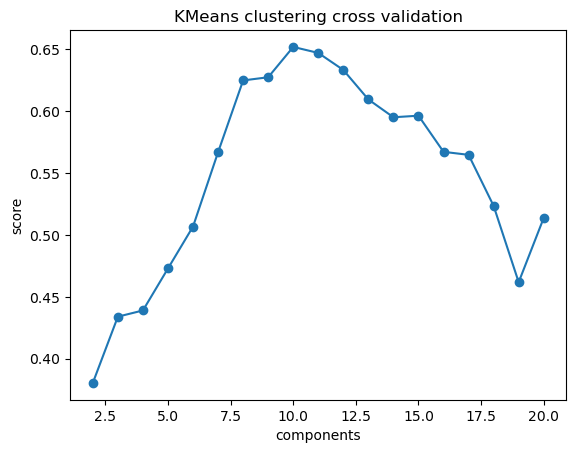

Best number of clusters:  10


In [24]:
plt.plot(np.arange(2, 21, 1), s_scores, marker = 'o')
plt.title('KMeans clustering cross validation')
plt.xlabel('components')
plt.ylabel('score')
plt.show()

print('Best number of clusters: ',np.argmax(s_scores) + 2) # two because I'm starting from n = 2!

Nice, I got 10!

In [21]:
KM = KMeans(init="k-means++", n_clusters = 10, n_init = 10, random_state=0)
KM.fit(X_reduced)
cluster_centers = KM.cluster_centers_
labels = KM.predict(X_reduced)
print(np.unique(labels))

[0 1 2 3 4 5 6 7 8 9]


Pretty similar results with the MeanShift. The bandwidth should be cross validated, here is just to show I can get the same number result with a different algorithm

In [22]:
MS = MeanShift(bandwidth = 12)
MS.fit(X_reduced)
MS_labels = MS.labels_
print(np.unique(labels))

[0 1 2 3 4 5 6 7 8 9]


/var/folders/g_/40lz4w497n1gy_c45xmkxftw0000gn/T/ipykernel_47684/665372704.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_reduced[MS_labels == i, 0], X_reduced[MS_labels == i, 1], alpha = 0.3, cmap = "nipy_spectral", edgecolor = "None")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/g_/40lz4w497n1gy_c45xmkxftw0000gn/T/ipykernel_47684/665372704.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_reduced[labels == i, 0], X_reduced[labels == i, 1], alpha = 0.3, cmap = "nipy_spectral", edgecolor = "None")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


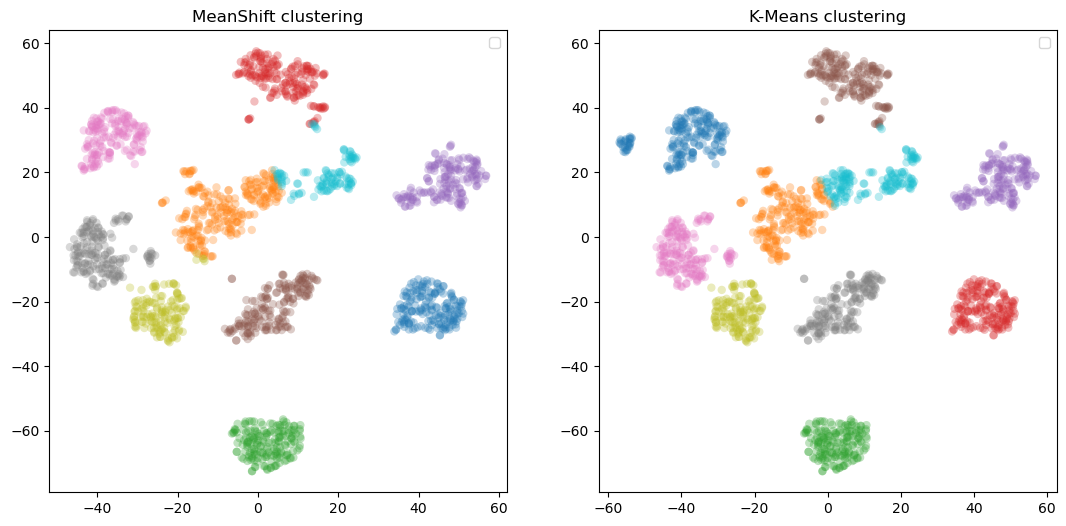

In [23]:
fig = plt.figure(figsize = (13, 6))

ax = fig.add_subplot(121)
for i in range(0, 10):
    ax.scatter(X_reduced[MS_labels == i, 0], X_reduced[MS_labels == i, 1], alpha = 0.3, cmap = "nipy_spectral", edgecolor = "None")

ax.set_title('MeanShift clustering')
ax.legend()

ax = fig.add_subplot(122)
for i in range(0, 10):
    ax.scatter(X_reduced[labels == i, 0], X_reduced[labels == i, 1], alpha = 0.3, cmap = "nipy_spectral", edgecolor = "None")

ax.set_title('K-Means clustering')
ax.legend()

plt.show()

This labels have nothing to do with the real numbers in the dataset, they are just the labels given to the different clusters found by the algorithm. The clusters seem well defined and in broad agreement with the results obtained with the true labels: the small clumps that appear in the figure are missclassified with respect to the true labels.